In [75]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

housedata = pd.read_csv('train.csv')
housedata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Problems
Problem 1 : Analysis of Numeric Variables
In this problem, your job is to analyze the following numeric variables in the dataset and their relationship with SalePrice.
['LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea']

a) Which of these variables has the maximum number of outliers as per box-plot? How many outliers does it have?




In [76]:
p1=housedata[['LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea']]
p1

,LotArea,GrLivArea,TotalBsmtSF,GarageArea
0,8450,1710,856,548
1,9600,1262,1262,460
2,11250,1786,920,608
3,9550,1717,756,642
4,14260,2198,1145,836
...,...,...,...,...
1455,7917,1647,953,460
1456,13175,2073,1542,500
1457,9042,2340,1152,252
1458,9717,1078,1078,240


In [77]:
p1.describe().round(2)

,LotArea,GrLivArea,TotalBsmtSF,GarageArea
count,1460.00,1460.00,1460.00,1460.00
mean,10516.83,1515.46,1057.43,472.98
std,9981.26,525.48,438.71,213.80
min,1300.00,334.00,0.00,0.00
25%,7553.50,1129.50,795.75,334.50
50%,9478.50,1464.00,991.50,480.00
75%,11601.50,1776.75,1298.25,576.00
max,215245.00,5642.00,6110.00,1418.00


<AxesSubplot:>

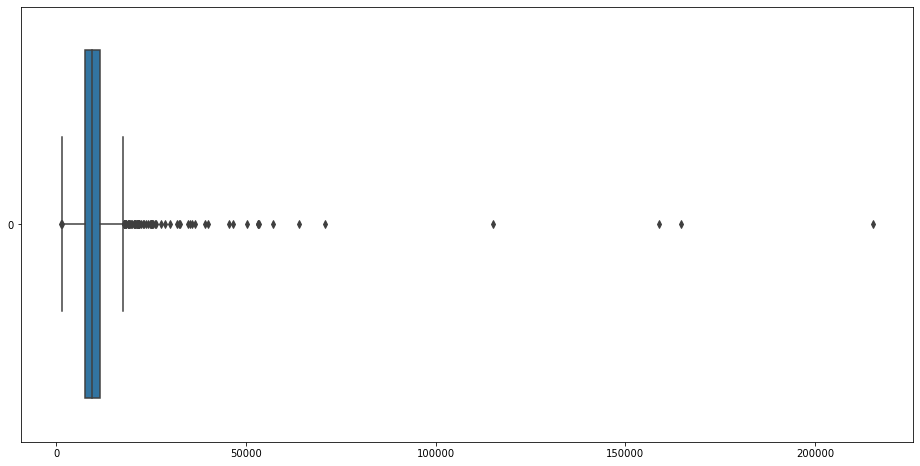

In [78]:
f= plt.figure(figsize=(16,8))
sb.boxplot(data = p1["LotArea"], orient="h")

#p1["LotArea", "GrLivArea", "TotalBsmtSF", "GarageArea"]

<AxesSubplot:>

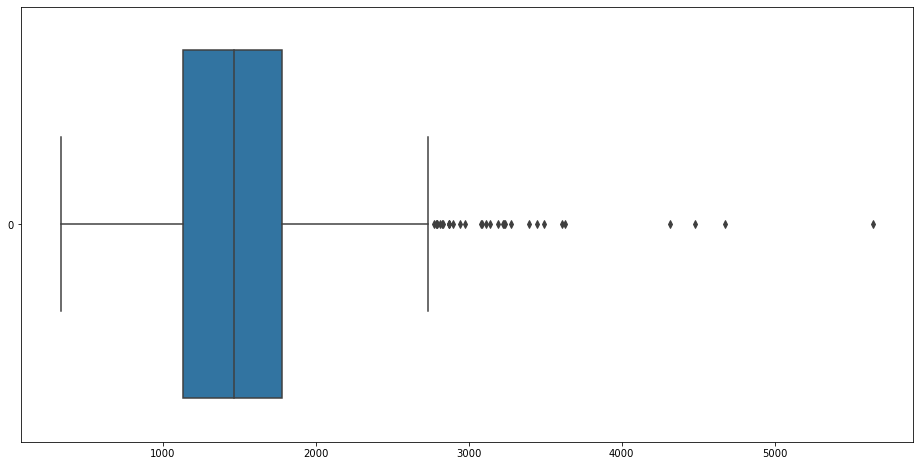

In [79]:
f= plt.figure(figsize=(16,8))
sb.boxplot(data = p1["GrLivArea"], orient="h")

<AxesSubplot:>

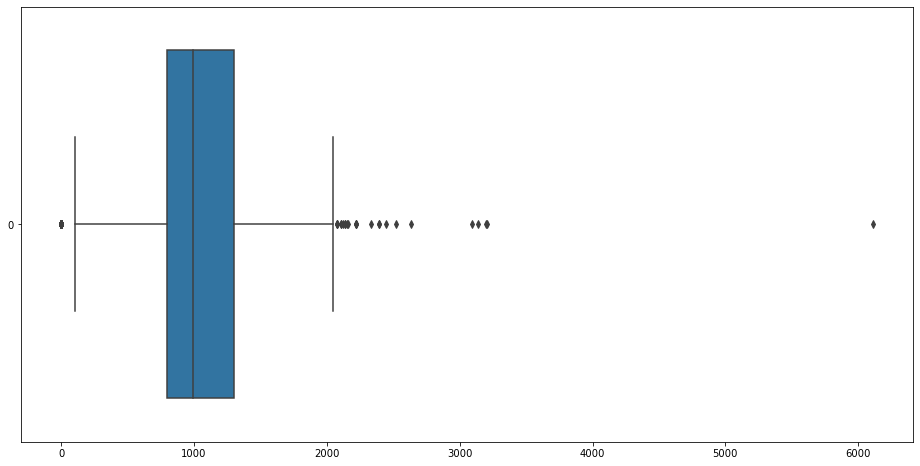

In [80]:
f= plt.figure(figsize=(16,8))
sb.boxplot(data = p1["TotalBsmtSF"], orient="h")

<AxesSubplot:>

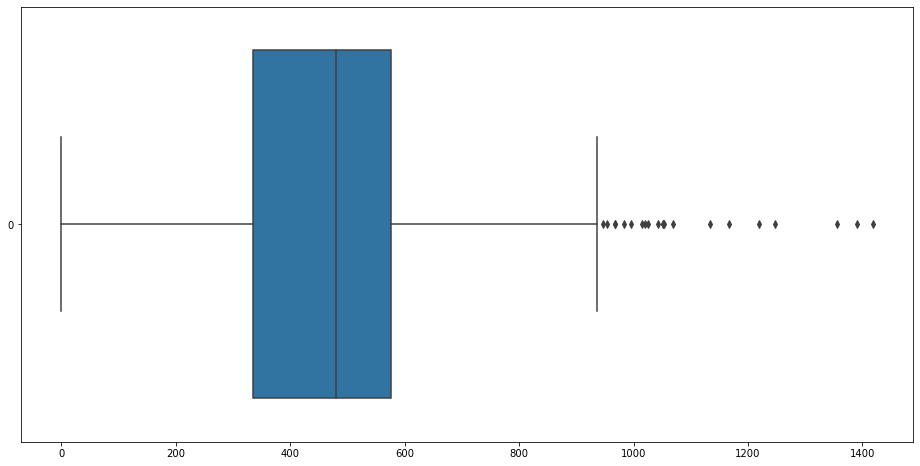

In [81]:
f= plt.figure(figsize=(16,8))
sb.boxplot(data = p1["GarageArea"], orient="h")

In [82]:
q1=p1.quantile(0.25)
q3=p1.quantile(0.75)
iqr=q3-q1
((p1 < q1-1.5*iqr) | (p1 > q3+1.5*iqr)).sum()

LotArea        69
GrLivArea      31
TotalBsmtSF    61
GarageArea     21
dtype: int64

**LotArea has the most outliers as per box-plot, of 69 outliers

b) Which of these variables is the most skewed from a regular normal distribution? Is the skew positive or negative?

In [84]:
p1.skew(axis=0, skipna=True)

LotArea        12.207688
GrLivArea       1.366560
TotalBsmtSF     1.524255
GarageArea      0.179981
dtype: float64

**LotArea has the greatest positive skew, hence it is the most skewed from normal distribution

c) Choose the top two variables that you think will help us the most in predicting ‘SalePrice’ of houses in this data.
Hints and Pointers

o In case of box-plot, outliers are the datapoints outside the whiskers, which are at Q1 – 1.5 IQR and Q3 + 1.5 IQR.

o Pandas has a bunch of statistical measures built in as methods/functions; .median() and .mean(), for example.

o Predicting one numeric variable with another numeric variable is easiest when they have a strong relationship.

In [85]:
joindata = pd.concat([p1,housedata[["SalePrice"]]], axis=1)
joindata

,LotArea,GrLivArea,TotalBsmtSF,GarageArea,SalePrice
0,8450,1710,856,548,208500
1,9600,1262,1262,460,181500
2,11250,1786,920,608,223500
3,9550,1717,756,642,140000
4,14260,2198,1145,836,250000
...,...,...,...,...,...
1455,7917,1647,953,460,175000
1456,13175,2073,1542,500,210000
1457,9042,2340,1152,252,266500
1458,9717,1078,1078,240,142125


In [86]:
joindata.corr()

,LotArea,GrLivArea,TotalBsmtSF,GarageArea,SalePrice
LotArea,1.000000,0.263116,0.260833,0.180403,0.263843
GrLivArea,0.263116,1.000000,0.454868,0.468997,0.708624
TotalBsmtSF,0.260833,0.454868,1.000000,0.486665,0.613581
GarageArea,0.180403,0.468997,0.486665,1.000000,0.623431
SalePrice,0.263843,0.708624,0.613581,0.623431,1.000000


<AxesSubplot:>

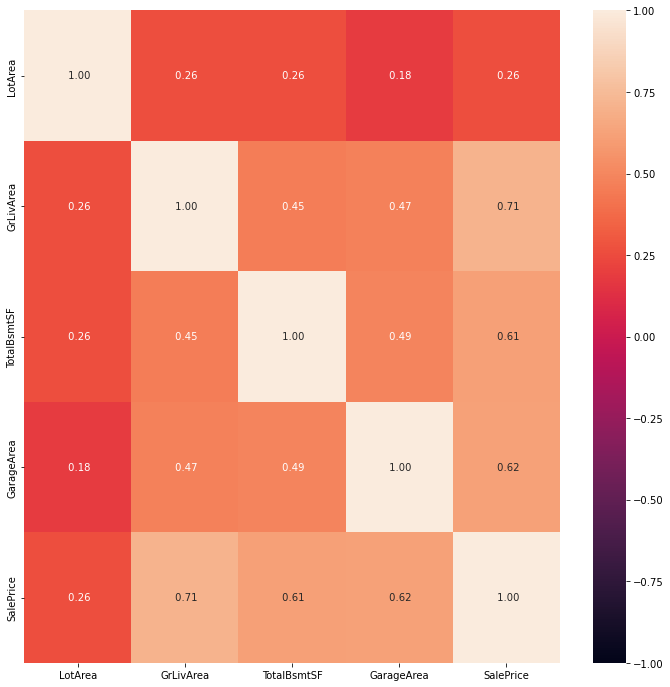

In [93]:
f = plt.figure(figsize=(12,12))
sb.heatmap(joindata.corr(), vmin=-1, vmax=1, annot=True, fmt=" .2f")

**strongest correlation of Saleprice is with GrLivArea and GarageArea

Problem 2 : Analysis of Categorical Variables
In this problem, your job is to analyze the following categorical variables in the data and their relationship with SalePrice.

['MSSubClass', 'Neighborhood', 'BldgType', 'OverallQual']

a) Which of these variables has the highest number of levels? Which of the levels has the highest number of houses?

In [119]:
p2=housedata[['MSSubClass', 'Neighborhood', 'BldgType', 'OverallQual']]
p2
p2[['Neighborhood']].astype('category')

,Neighborhood
0,CollgCr
1,Veenker
2,CollgCr
3,Crawfor
4,NoRidge
...,...
1455,Gilbert
1456,NWAmes
1457,Crawfor
1458,NAmes


In [95]:
for x in p2:
    print(p2.head())
    print(len(p2[x].unique()))

   MSSubClass Neighborhood BldgType  OverallQual
0          60      CollgCr     1Fam            7
1          20      Veenker     1Fam            6
2          60      CollgCr     1Fam            7
3          70      Crawfor     1Fam            7
4          60      NoRidge     1Fam            8
15
   MSSubClass Neighborhood BldgType  OverallQual
0          60      CollgCr     1Fam            7
1          20      Veenker     1Fam            6
2          60      CollgCr     1Fam            7
3          70      Crawfor     1Fam            7
4          60      NoRidge     1Fam            8
25
   MSSubClass Neighborhood BldgType  OverallQual
0          60      CollgCr     1Fam            7
1          20      Veenker     1Fam            6
2          60      CollgCr     1Fam            7
3          70      Crawfor     1Fam            7
4          60      NoRidge     1Fam            8
5
   MSSubClass Neighborhood BldgType  OverallQual
0          60      CollgCr     1Fam            7
1          2

**Neighbourhood has the highest number of levels

In [96]:
print(p2['Neighborhood'].dtype)

object


In [153]:
print(housedata[['Neighborhood']].value_counts())

Neighborhood
NAmes           225
CollgCr         150
OldTown         113
Edwards         100
Somerst          86
Gilbert          79
NridgHt          77
Sawyer           74
NWAmes           73
SawyerW          59
BrkSide          58
Crawfor          51
Mitchel          49
NoRidge          41
Timber           38
IDOTRR           37
ClearCr          28
StoneBr          25
SWISU            25
Blmngtn          17
MeadowV          17
BrDale           16
Veenker          11
NPkVill           9
Blueste           2
dtype: int64


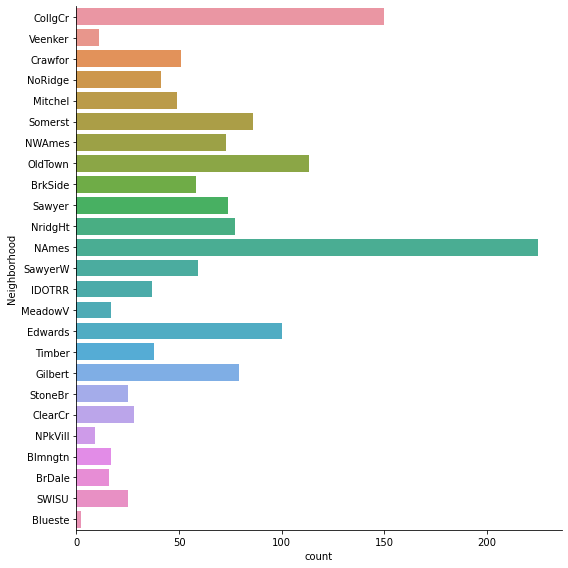

In [154]:
sb.catplot(y = "Neighborhood", data = housedata, kind = "count", height = 8)

**'NAmes' level in Neighbourhood has the most number of houses in it

b) Choose the top two variables that you think will help us the most in predicting ‘SalePrice’ of houses in this data

In [139]:
jointdata1 = pd.concat([p2,housedata[["SalePrice"]]], axis=1)
jointdata1

,MSSubClass,Neighborhood,BldgType,OverallQual,SalePrice
0,60,CollgCr,1Fam,7,208500
1,20,Veenker,1Fam,6,181500
2,60,CollgCr,1Fam,7,223500
3,70,Crawfor,1Fam,7,140000
4,60,NoRidge,1Fam,8,250000
...,...,...,...,...,...
1455,60,Gilbert,1Fam,6,175000
1456,20,NWAmes,1Fam,6,210000
1457,70,Crawfor,1Fam,7,266500
1458,20,NAmes,1Fam,5,142125


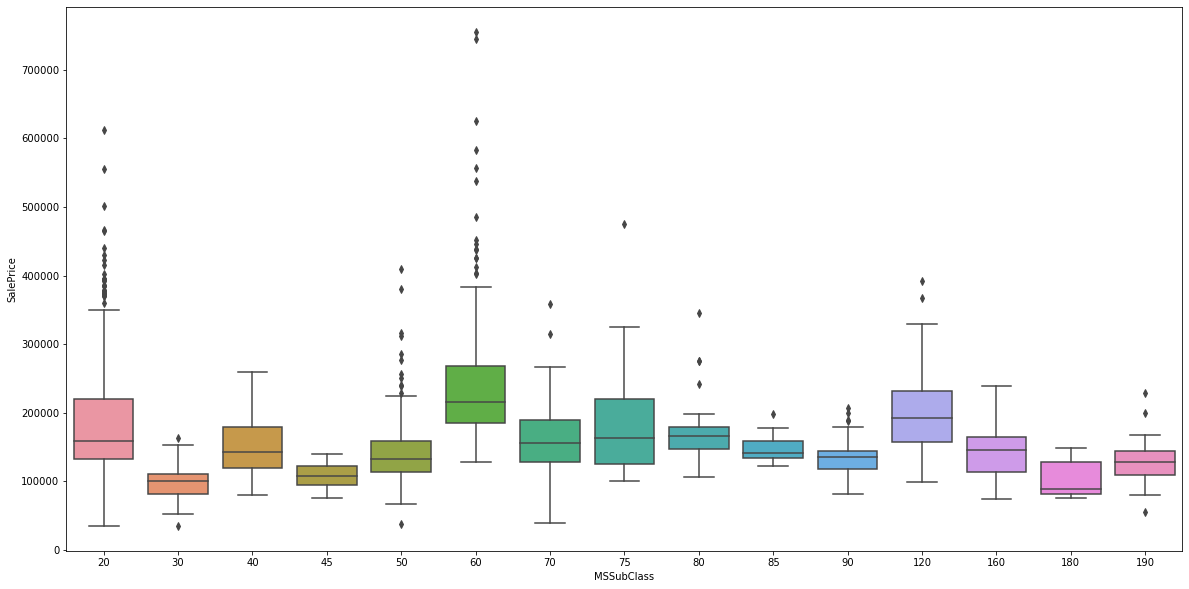

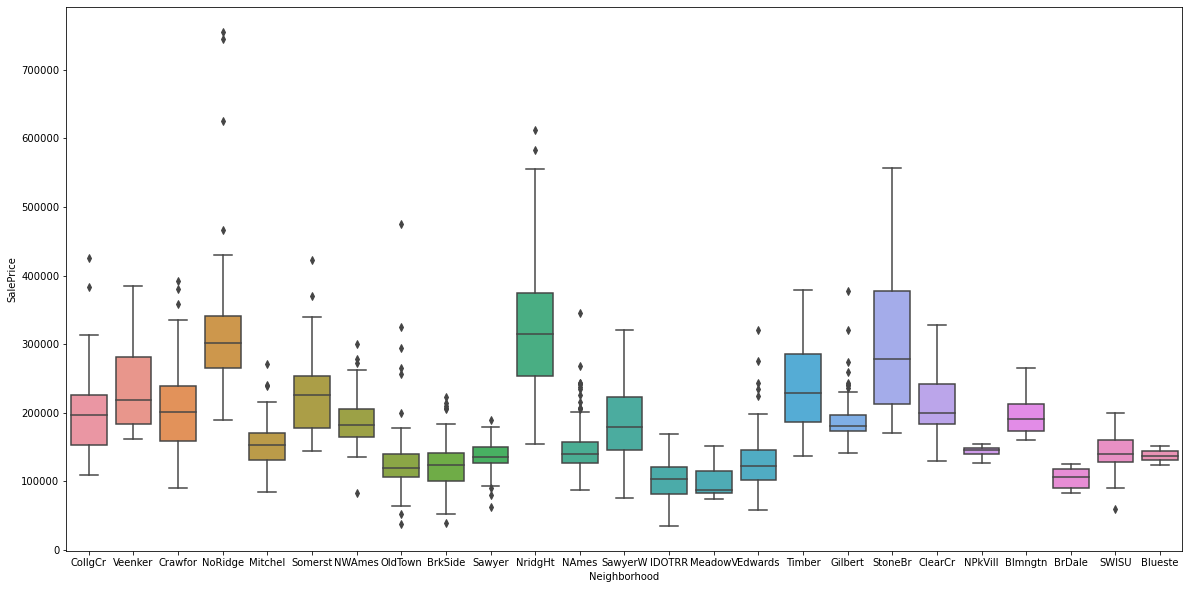

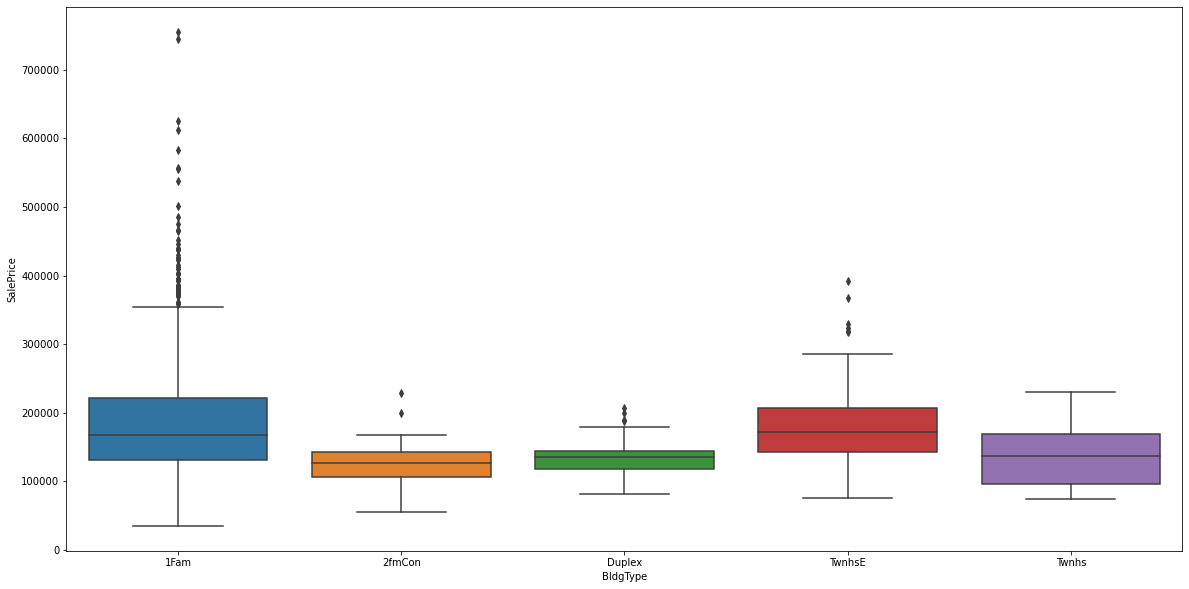

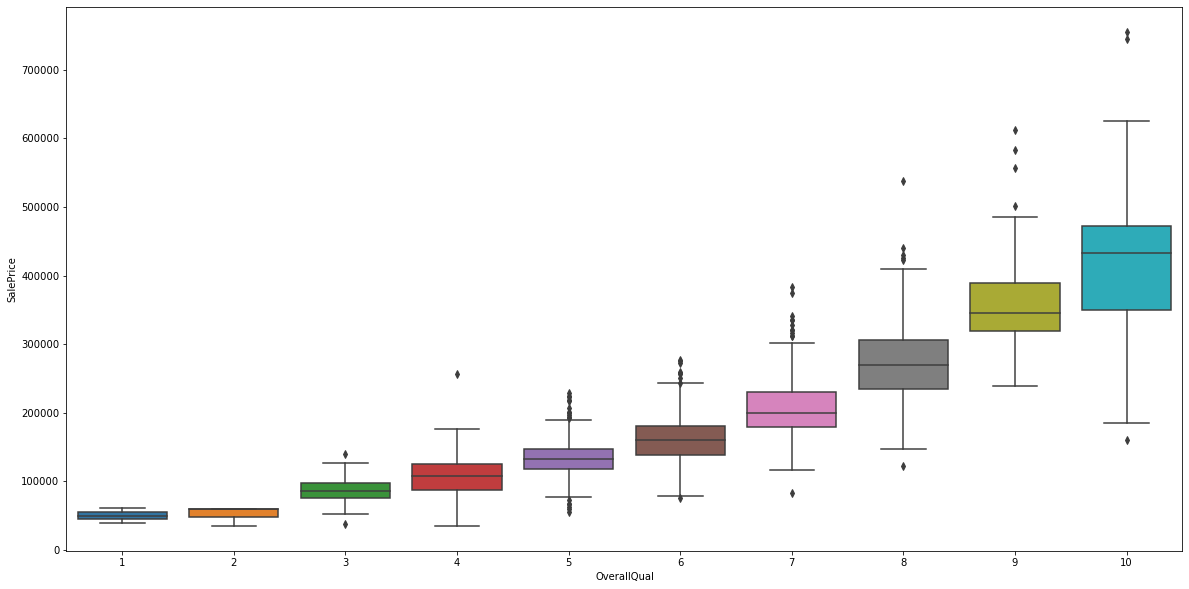

In [152]:
# f, axes = plt.subplots(3, 3, figsize=(18, 12))
#f=plt.figure(figsize=(20,5))
#sb.boxplot(data = joinplot1, orient='v', x='MSSubClass', y='SalePrice')

for var in p2:
    f=plt.figure(figsize=(20,10))
    #order=jointdata1.groupby(jointdata1[var])['SalePrice']
    sb.boxplot(data = jointdata1, orient='v', x=var, y='SalePrice')

**I think OverallQual and Neighourhood helps us most in predicting 'Saleprice' of houses in this data
They have the least overlap with SalePrice data, hence, giving more hints on the relative trend of sale prices with respect to the houses in the data that can help us better predict the sale price of houses

Problem 3 : Interesting Questions for EDA
Choose any ONE of the following questions to answer. You may always try out the other one at home if you want. 

a) Does the SalePrice of a house get affected by whether it has a Garage or not? Justify your answer using EDA.

In [158]:
p3=housedata[['GarageType']]
p3.head()

,GarageType
0,Attchd
1,Attchd
2,Attchd
3,Detchd
4,Attchd


In [159]:
p3['GarageExists']=np.where(p3[['GarageType']].isnull(), "False", "True")
p3

C:\Users\QLIANG~1\AppData\Local\Temp/ipykernel_12856/3611687956.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p3['GarageExists']=np.where(p3[['GarageType']].isnull(), "False", "True")


,GarageType,GarageExists
0,Attchd,True
1,Attchd,True
2,Attchd,True
3,Detchd,True
4,Attchd,True
...,...,...
1455,Attchd,True
1456,Attchd,True
1457,Attchd,True
1458,Attchd,True


In [160]:
Garage=pd.concat([GarageExists, housedata['SalePrice']], axis=1)
Garage

,Garage Exists,GarageExists,SalePrice
0,Attchd,True,208500
1,Attchd,True,181500
2,Attchd,True,223500
3,Detchd,True,140000
4,Attchd,True,250000
...,...,...,...
1455,Attchd,True,175000
1456,Attchd,True,210000
1457,Attchd,True,266500
1458,Attchd,True,142125


In [161]:
Garage=pd.concat([p3, housedata['SalePrice']], axis=1)
Garage


,GarageType,GarageExists,SalePrice
0,Attchd,True,208500
1,Attchd,True,181500
2,Attchd,True,223500
3,Detchd,True,140000
4,Attchd,True,250000
...,...,...,...
1455,Attchd,True,175000
1456,Attchd,True,210000
1457,Attchd,True,266500
1458,Attchd,True,142125


<AxesSubplot:xlabel='GarageExists', ylabel='SalePrice'>

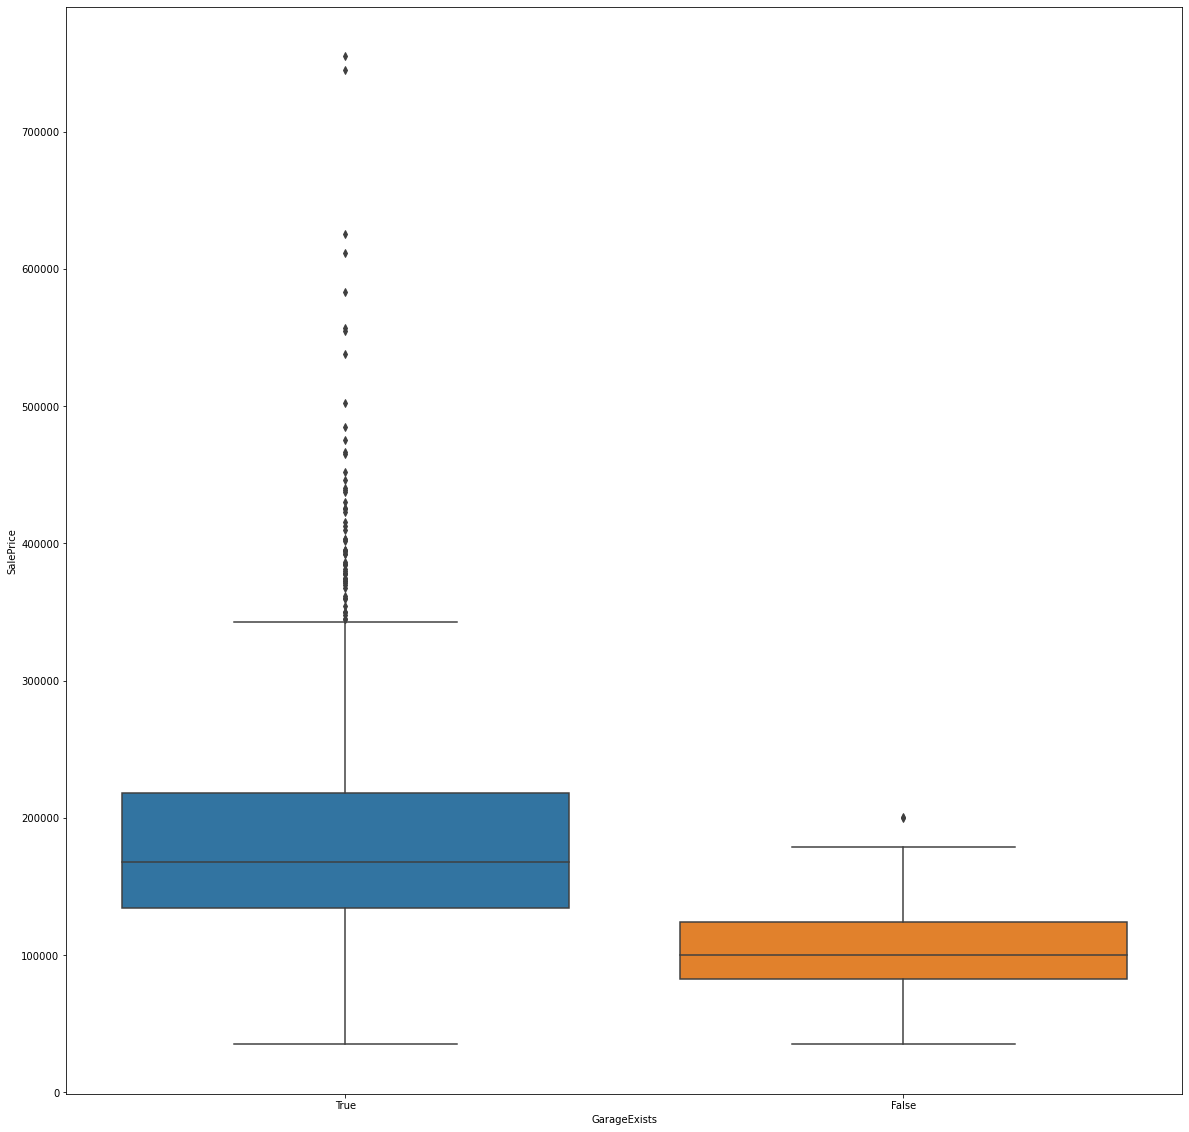

In [132]:
f=plt.figure(figsize=(20,20))
sb.boxplot(data = Garage, orient='v', x='GarageExists', y='SalePrice')

**Based on the boxplot, median, mean and quartiles of the sale price of houses with no garage are lower than houses with garages
Therfore, sale price does get affected by presence of garage, as houses with a garage generally cost more than those with no garages
